In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json  # for json files
import numpy as np
from plots import plot_histogram
from datetime import datetime


In [3]:
data = pd.read_csv("data_sample.csv")


In [4]:
format = "%Y-%m-%dT%H:%M:%S.%fZ"
data['@timestamp'] = data['@timestamp'].apply(lambda x: datetime.strptime(x, format))

In [5]:
date_sorted = data.sort_values(by=['@timestamp'], ascending=True)

In [6]:
develop_server = date_sorted.loc[data.host == "{'name': 'DEVELOP'}"]


In [7]:
develop_server = develop_server.dropna(subset=['system'])

In [8]:
develop_server

,@timestamp,@version,event,host,system
68720,2023-03-01 00:04:09.723,1,{'dataset': 'system.cpu'},{'name': 'DEVELOP'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.662}, '..."
55348,2023-03-01 00:07:59.741,1,{'dataset': 'system.network'},{'name': 'DEVELOP'},"{'network': {'out': {'bytes': 0}, 'in': {'byte..."
48527,2023-03-01 00:09:29.738,1,{'dataset': 'system.cpu'},{'name': 'DEVELOP'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.9719}, ..."
71155,2023-03-01 00:09:29.738,1,{'dataset': 'system.network'},{'name': 'DEVELOP'},"{'network': {'out': {'bytes': 27006814665}, 'i..."
69204,2023-03-01 00:17:09.736,1,{'dataset': 'system.cpu'},{'name': 'DEVELOP'},"{'cpu': {'cores': 4, 'idle': {'pct': 3.4679}, ..."
...,...,...,...,...,...
93483,2023-03-31 23:29:51.489,1,{'dataset': 'system.memory'},{'name': 'DEVELOP'},"{'memory': {'swap': {'total': 9931096064, 'fre..."
23431,2023-03-31 23:32:11.469,1,{'dataset': 'system.network'},{'name': 'DEVELOP'},"{'network': {'out': {'bytes': 21109343410}, 'i..."
83537,2023-03-31 23:35:01.475,1,{'dataset': 'system.network'},{'name': 'DEVELOP'},"{'network': {'out': {'bytes': 21110120779}, 'i..."
97005,2023-03-31 23:39:11.497,1,{'dataset': 'system.memory'},{'name': 'DEVELOP'},"{'memory': {'swap': {'total': 9931096064, 'fre..."


In [9]:
def process_network(network):
    out = network['out']['bytes']
    in_ = network['in']['bytes']
    return out, in_

def process_cpu(cpu):
    cores = cpu['cores']
    idle = cpu['idle']['pct'] / cores
    user = cpu['user']['pct'] / cores
    system = cpu['system']['pct'] / cores

    return idle, user, system

def process_memory(memory):
    total = memory['actual']['used']['bytes'] + memory['free']

    actual = 1 - memory['actual']['used']['bytes'] / total
    free = memory['free'] / total
    swap = 1 - (memory['swap']['free'] / memory['swap']['total'])

    return swap, actual, free

In [10]:
# Divide datatyoes
networks = []
network_times = []

cpus = []
cpus_times = []

memories = []
memories_times = []

for i, row in develop_server.iterrows():
    sys = row['system']
    time = row['@timestamp']

    if type(sys) == float:
        continue

    s = sys.replace("\'", "\"")
    s = read_json(s)
    data_type = list(s.keys())[0]

    if data_type == 'network':
        info = process_network(s['network'])
        networks.append(info)
        network_times.append(time)

    if data_type == 'cpu':
        info = process_cpu(s['cpu'])
        cpus.append(info)
        cpus_times.append(time)

    if data_type == 'memory':
        info = process_memory(s['memory'])
        memories.append(info)
        memories_times.append(time)
 

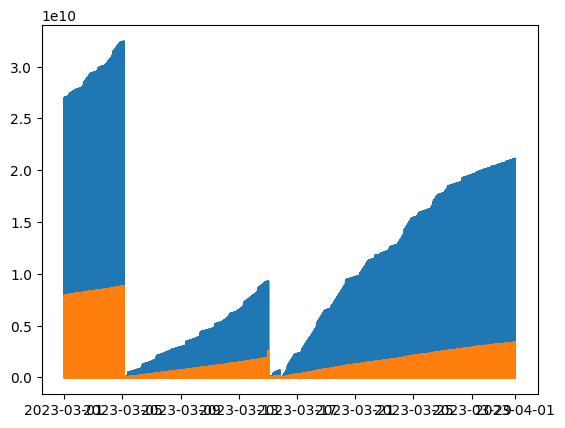

In [11]:

fig, ax = plt.subplots()
ax.plot(network_times, networks)
plt.show()

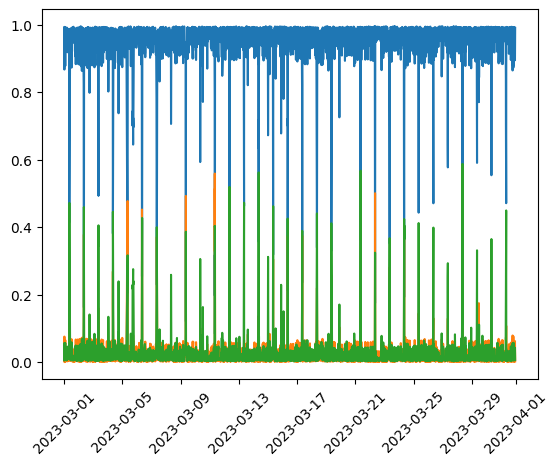

In [12]:
fig, ax = plt.subplots()
ax.plot(cpus_times, cpus)
plt.xticks(rotation=45)
plt.show()

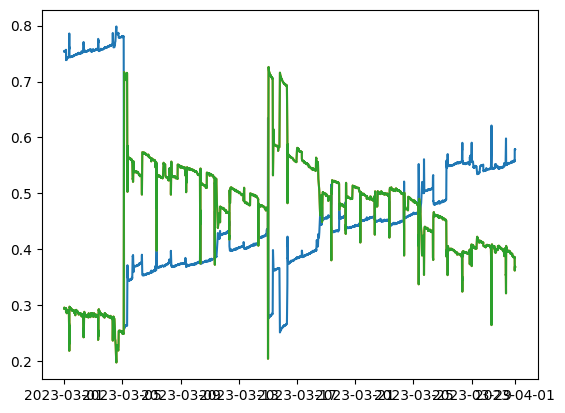

In [13]:
fig, ax = plt.subplots()
ax.plot(memories_times, memories)
plt.show()

In [14]:
one = list(map(lambda m: m(1), memories))
two = list(map(lambda m: m(2), memories))
three = list(map(lambda m: m(3), memories))


TypeError: 'tuple' object is not callable

In [ ]:
cpus

[                   @timestamp  @version                          event   
 0     2023-03-15 09:28:35.217         1  {'dataset': 'system.network'}  \
 1     2023-03-16 03:18:43.551         1  {'dataset': 'system.network'}   
 2     2023-03-01 08:09:17.822         1      {'dataset': 'system.cpu'}   
 3     2023-03-27 20:31:45.971         1      {'dataset': 'system.cpu'}   
 4     2023-03-27 17:06:04.885         1  {'dataset': 'system.network'}   
 ...                       ...       ...                            ...   
 99995 2023-03-06 23:11:53.909         1  {'dataset': 'system.network'}   
 99996 2023-03-30 13:33:20.864         1  {'dataset': 'system.network'}   
 99997 2023-03-21 08:34:38.317         1  {'dataset': 'system.network'}   
 99998 2023-03-17 09:16:31.559         1  {'dataset': 'system.network'}   
 99999 2023-03-29 19:41:10.864         1  {'dataset': 'system.network'}   
 
                             host   
 0            {'name': 'DEVELOP'}  \
 1           {'name': 'Q